<h1>目录<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#逻辑回归" data-toc-modified-id="逻辑回归-1">逻辑回归</a></span></li><li><span><a href="#决策树" data-toc-modified-id="决策树-2">决策树</a></span></li><li><span><a href="#神经网络" data-toc-modified-id="神经网络-3">神经网络</a></span></li></ul></div>

# 逻辑回归

In [1]:
import pandas as pd

In [2]:
data_path = './data/bankloan.xls'
df = pd.read_excel(data_path)

In [24]:
x = df.iloc[:,:8]

In [25]:
y = df.iloc[:,8]

In [26]:
from sklearn.linear_model import LogisticRegression as LR
from sklearn.linear_model import RandomizedLogisticRegression as RLR

In [27]:
rlr = RLR()

In [28]:
rlr.fit(x, y)

RandomizedLogisticRegression(C=1, fit_intercept=True, memory=None,
               n_jobs=None, n_resampling=200, normalize=True,
               pre_dispatch='3*n_jobs', random_state=None,
               sample_fraction=0.75, scaling=0.5, selection_threshold=0.25,
               tol=0.001, verbose=False)

In [29]:
rlr.get_support()

array([False, False,  True,  True, False,  True,  True, False])

In [31]:
print('有效特征为：%s' % '，'.join(x.columns[rlr.get_support()]))

有效特征为：工龄，地址，负债率，信用卡负债


In [40]:
x = x[x.columns[rlr.get_support()]]

In [44]:
lr = LR(solver='lbfgs')

In [45]:
lr.fit(x, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [46]:
print('模型回归正确率：%s' % lr.score(x,y))

模型回归正确率：0.8142857142857143


# 决策树

In [66]:
filename = './data/sales_data.xls'
data = pd.read_excel(filename, index_col='序号')

In [67]:
data.head()

,天气,是否周末,是否有促销,销量
序号,,,,
1,坏,是,是,高
2,坏,是,是,高
3,坏,是,是,高
4,坏,否,是,高
5,坏,是,是,高


In [69]:
data[data == '是'] = 1
data[data == '好'] = 1
data[data == '高'] = 1
data[data != 1] = 0

In [70]:
data.head()

,天气,是否周末,是否有促销,销量
序号,,,,
1,0,1,1,1
2,0,1,1,1
3,0,1,1,1
4,0,0,1,1
5,0,1,1,1


In [75]:
x = data.iloc[:,:3].astype('int')

In [77]:
x.head()

,天气,是否周末,是否有促销
序号,,,
1,0,1,1
2,0,1,1
3,0,1,1
4,0,0,1
5,0,1,1


In [78]:
y = data.iloc[:,3].astype('int')

In [79]:
from sklearn.tree import DecisionTreeClassifier as DTC

In [80]:
dtc = DTC(criterion='entropy')

In [81]:
dtc.fit(x,y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [97]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
from IPython.display import display
import graphviz
import re

安装`Graphviz`：

1. `brew install graphviz`

2. `pip install graphviz`

In [133]:
f = export_graphviz(dtc, feature_names=x.columns, out_file=None, filled=True,
                  special_characters=True, rotate=True)

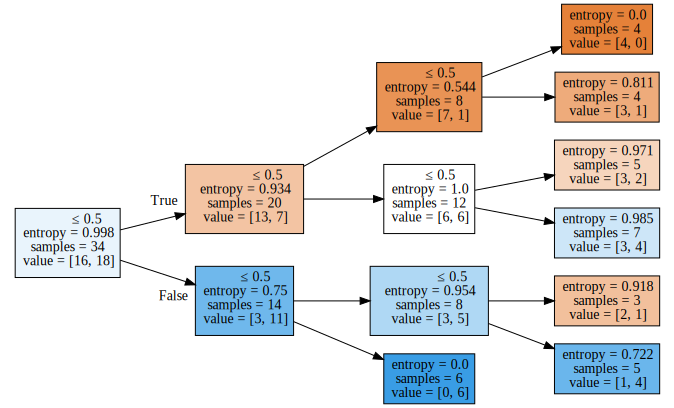

In [134]:
display(graphviz.Source(re.sub('Tree {',
       f'Tree {{ size=10; ratio=0.6', f)))

# 神经网络

In [159]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation

In [183]:
model = Sequential()
model.add(Dense(10, input_dim=3))
model.add(Activation('relu'))
model.add(Dense(1))
model.add(Activation('sigmoid'))

In [184]:
model.compile(loss='binary_crossentropy', optimizer='adam')

In [185]:
import numpy as np

In [187]:
model.fit(x.values.astype('bool'), y.values.astype('bool'), epochs=1000)

Epoch 1/1000
34/34 [==============================] - 0s 135us/step - loss: 0.7028
Epoch 2/1000
34/34 [==============================] - 0s 183us/step - loss: 0.7009
Epoch 3/1000
34/34 [==============================] - 0s 169us/step - loss: 0.6992
Epoch 4/1000
34/34 [==============================] - 0s 168us/step - loss: 0.6975
Epoch 5/1000
34/34 [==============================] - 0s 150us/step - loss: 0.6959
Epoch 6/1000
34/34 [==============================] - 0s 142us/step - loss: 0.6946
Epoch 7/1000
34/34 [==============================] - 0s 159us/step - loss: 0.6933
Epoch 8/1000
34/34 [==============================] - 0s 235us/step - loss: 0.6921
Epoch 9/1000
34/34 [==============================] - 0s 232us/step - loss: 0.6910
Epoch 10/1000
34/34 [==============================] - 0s 142us/step - loss: 0.6898
Epoch 11/1000
34/34 [==============================] - 0s 174us/step - loss: 0.6888
Epoch 12/1000
34/34 [==============================] - 0s 231us/step - loss: 0.6877
E

34/34 [==============================] - 0s 108us/step - loss: 0.6141
Epoch 195/1000
34/34 [==============================] - 0s 153us/step - loss: 0.6138
Epoch 196/1000
34/34 [==============================] - 0s 193us/step - loss: 0.6135
Epoch 197/1000
34/34 [==============================] - 0s 146us/step - loss: 0.6131
Epoch 198/1000
34/34 [==============================] - 0s 181us/step - loss: 0.6128
Epoch 199/1000
34/34 [==============================] - 0s 196us/step - loss: 0.6124
Epoch 200/1000
34/34 [==============================] - 0s 168us/step - loss: 0.6120
Epoch 201/1000
34/34 [==============================] - 0s 142us/step - loss: 0.6116
Epoch 202/1000
34/34 [==============================] - 0s 147us/step - loss: 0.6112
Epoch 203/1000
34/34 [==============================] - 0s 173us/step - loss: 0.6109
Epoch 204/1000
34/34 [==============================] - 0s 175us/step - loss: 0.6105
Epoch 205/1000
34/34 [==============================] - 0s 150us/step - loss: 0.

34/34 [==============================] - 0s 195us/step - loss: 0.5625
Epoch 387/1000
34/34 [==============================] - 0s 165us/step - loss: 0.5623
Epoch 388/1000
34/34 [==============================] - 0s 214us/step - loss: 0.5621
Epoch 389/1000
34/34 [==============================] - 0s 169us/step - loss: 0.5619
Epoch 390/1000
34/34 [==============================] - 0s 120us/step - loss: 0.5617
Epoch 391/1000
34/34 [==============================] - 0s 165us/step - loss: 0.5615
Epoch 392/1000
34/34 [==============================] - 0s 133us/step - loss: 0.5613
Epoch 393/1000
34/34 [==============================] - 0s 166us/step - loss: 0.5611
Epoch 394/1000
34/34 [==============================] - 0s 141us/step - loss: 0.5609
Epoch 395/1000
34/34 [==============================] - 0s 211us/step - loss: 0.5608
Epoch 396/1000
34/34 [==============================] - 0s 139us/step - loss: 0.5606
Epoch 397/1000
34/34 [==============================] - 0s 192us/step - loss: 0.

34/34 [==============================] - 0s 207us/step - loss: 0.5235
Epoch 579/1000
34/34 [==============================] - 0s 253us/step - loss: 0.5232
Epoch 580/1000
34/34 [==============================] - 0s 165us/step - loss: 0.5229
Epoch 581/1000
34/34 [==============================] - 0s 251us/step - loss: 0.5227
Epoch 582/1000
34/34 [==============================] - 0s 144us/step - loss: 0.5224
Epoch 583/1000
34/34 [==============================] - 0s 136us/step - loss: 0.5222
Epoch 584/1000
34/34 [==============================] - 0s 180us/step - loss: 0.5220
Epoch 585/1000
34/34 [==============================] - 0s 206us/step - loss: 0.5217
Epoch 586/1000
34/34 [==============================] - 0s 151us/step - loss: 0.5216
Epoch 587/1000
34/34 [==============================] - 0s 113us/step - loss: 0.5213
Epoch 588/1000
34/34 [==============================] - 0s 163us/step - loss: 0.5211
Epoch 589/1000
34/34 [==============================] - 0s 134us/step - loss: 0.

34/34 [==============================] - 0s 177us/step - loss: 0.4983
Epoch 771/1000
34/34 [==============================] - 0s 192us/step - loss: 0.4982
Epoch 772/1000
34/34 [==============================] - 0s 131us/step - loss: 0.4981
Epoch 773/1000
34/34 [==============================] - 0s 207us/step - loss: 0.4979
Epoch 774/1000
34/34 [==============================] - 0s 171us/step - loss: 0.4978
Epoch 775/1000
34/34 [==============================] - 0s 195us/step - loss: 0.4977
Epoch 776/1000
34/34 [==============================] - 0s 182us/step - loss: 0.4976
Epoch 777/1000
34/34 [==============================] - 0s 142us/step - loss: 0.4974
Epoch 778/1000
34/34 [==============================] - 0s 146us/step - loss: 0.4973
Epoch 779/1000
34/34 [==============================] - 0s 109us/step - loss: 0.4971
Epoch 780/1000
34/34 [==============================] - 0s 212us/step - loss: 0.4971
Epoch 781/1000
34/34 [==============================] - 0s 222us/step - loss: 0.

34/34 [==============================] - 0s 188us/step - loss: 0.4820
Epoch 963/1000
34/34 [==============================] - 0s 110us/step - loss: 0.4821
Epoch 964/1000
34/34 [==============================] - 0s 119us/step - loss: 0.4820
Epoch 965/1000
34/34 [==============================] - 0s 152us/step - loss: 0.4820
Epoch 966/1000
34/34 [==============================] - 0s 145us/step - loss: 0.4820
Epoch 967/1000
34/34 [==============================] - 0s 156us/step - loss: 0.4820
Epoch 968/1000
34/34 [==============================] - 0s 190us/step - loss: 0.4820
Epoch 969/1000
34/34 [==============================] - 0s 219us/step - loss: 0.4818
Epoch 970/1000
34/34 [==============================] - 0s 168us/step - loss: 0.4817
Epoch 971/1000
34/34 [==============================] - 0s 103us/step - loss: 0.4816
Epoch 972/1000
34/34 [==============================] - 0s 167us/step - loss: 0.4814
Epoch 973/1000
34/34 [==============================] - 0s 158us/step - loss: 0.

In [188]:
pred = model.predict_classes(x)

In [212]:
from sklearn.metrics import confusion_matrix 
import matplotlib.pyplot as plt

In [208]:
cm = confusion_matrix(y, pred[:,0])

In [209]:
cm

array([[12,  4],
       [ 4, 14]])

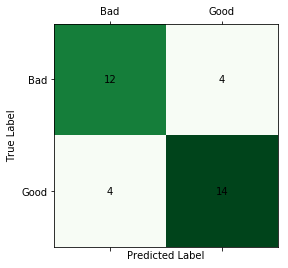

In [235]:
plt.matshow(cm, cmap=plt.cm.Greens)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.annotate(cm[i,j], xy=(i,j),horizontalalignment='center', verticalalignment='center')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.yticks([0,1], ['Bad', 'Good'])
plt.xticks([0,1], ['Bad', 'Good'])
plt.show()